# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.

In [5]:
# Load Matplotlib + Seaborn and SciPy libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [6]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Questions and Answers

### 1. Is the distribution of body temperatures normal? 

**Yes**. Based on the shape of the curve plotted with sample data, we have a normal distribution of body temperature.

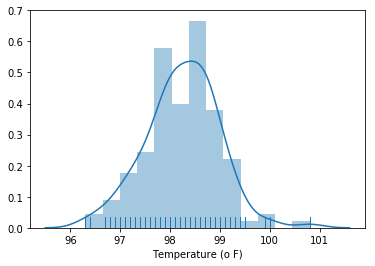

In [7]:
ax = sns.distplot(df[['temperature']], rug=True, axlabel='Temperature (o F)')

### 2. Is the sample size large? Are the observations independent?

Yes. We have 390 records in the sample data file (*df.size*).<br>
There is no connection or dependence between the measured temperature values, in other words, the observations are independent.

In [8]:
# Sample (dataset) size
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [10]:
# Mean, Max, Min and Standard deviation (temperature)
print("The mean temperature is = %f degrees F" % df['temperature'].mean(axis=0))
print("Max temp = %f degrees F" % df['temperature'].max(axis=0))
print("Min temp = %f degrees F" % df['temperature'].min(axis=0))
print("The standard deviation is = %f degrees F"% df['temperature'].std(axis=0))

The mean temperature is = 98.249231 degrees F
Max temp = 100.800000 degrees F
Min temp = 96.300000 degrees F
The standard deviation is = 0.733183 degrees F


### 3. Is the true population mean really 98.6 degrees F?

* ***Ho or Null hypothesis***: Average body temperature **is not** 98.6 degrees F
* ***Ha or Alternative hypothesis***: Average body temperature **is** 98.6 degrees F

What we got from sample data: <br>
* The mean temperature is **~98.2 degrees F**<br>
* The standard deviation (std) is **0.73 degrees F**<br><br>

We already know that:<br>
* Population mean is **98.6 degrees F**<br>
* Sample size (N) is **390**<br><br>

We have:<br>

In [38]:
# t distribuition
# t = ((sample_mean - reference_value)/ std_deviation ) * sqrt(sample_size)
t = ((98.2 - 98.6)/0.73)*np.sqrt(130)

In [42]:
# degrees of freedom
degree = 130 - 1

In [43]:
# p-value 
p = 1 - stats.t.cdf(t,df=degree)

In [44]:
# t-stats and p-value 
print("t = " + str(t))
print("p = " + str(2*p))

t = -6.24753657589
p = 1.99999999441


Then, with p-value = 2.0:
* At 0.01 of  statistical significance we can reject the Ho (null hypothesis).<br>
* At 0.025 of  statistical significance we can accept the Ho (null hypothesis).<br><br>


**a) Would you use a one-sample or two-sample test? Why?**<br>
**One-sample test**, once we want to know if the population mean is equal to a specified value (98.6 degrees F).

**b) In this situation, is it appropriate to use the t or z statistic?**<br>
It is appropriate to use *t* statistic<br>

**c) Now try using the other test. How is the result be different? Why?**<br>

### 4. Draw a small sample of size 10 from the data and repeat both tests.

In [54]:
# A sample with randomly 10 records from original dataset
df_sample10 = df.sample(n=10)

The histogram:

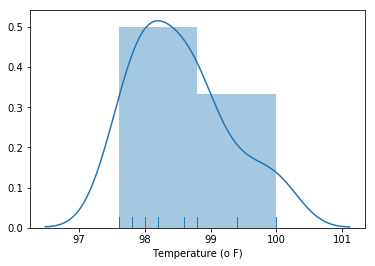

In [47]:
ax = sns.distplot(df_sample10[['temperature']], rug=True, axlabel='Temperature (o F)')

**Sample 10: Z-test = 0.99**

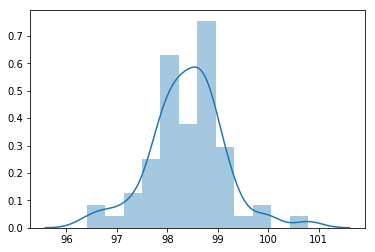

In [48]:
# Female temperature (mean and standard deviation)
df_female = df.loc[df['gender'] == 'F']
ax = sns.distplot(df_female[['temperature']])

In [49]:
print("Female temperature: mean = %f | std = %f" % (df_female['temperature'].mean(), df_female['temperature'].std())) 

Female temperature: mean = 98.393846 | std = 0.743488


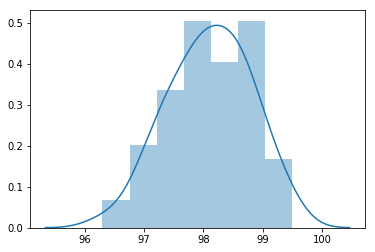

In [50]:
# Male temperature (mean and standard deviation)
df_male = df.loc[df['gender'] == 'M']
ax = sns.distplot(df_male[['temperature']])

In [51]:
print("Male temperature: mean = %f | std = %f" % (df_male['temperature'].mean(), df_male['temperature'].std())) 

Male temperature: mean = 98.104615 | std = 0.698756


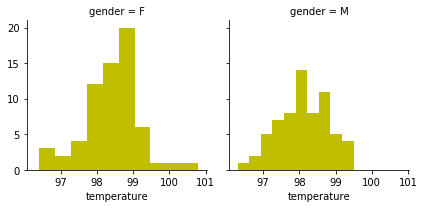

In [52]:
# Plotting histogram based on gender (Female/Male)
grid = sns.FacetGrid(df, col="gender")
grid.map(plt.hist, "temperature", color="y")

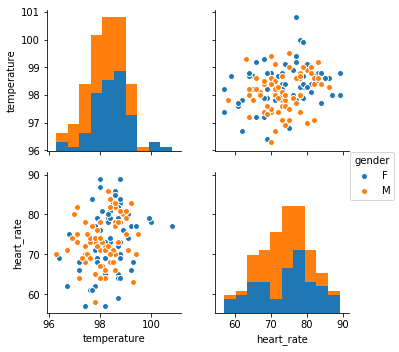

In [53]:
# Plotting Female/Male temperatures using Seaborn Pairplot
sns.pairplot(df, hue='gender', size=2.5)

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

We got a standard deviation/error of 0.7 degrees F, then, an "abnormal" temperature is greater than 99.37 and less than 97.9 degrees F.

### 6. Is there a significant difference between males and females in normal temperature?

**What test did you use and why?**

T-test: we use this test when we want to test if the difference between the averages of two independent populations (Female and Male) is equal to a target value.<br>
The difference between male and female mean temperature is ~0.3 degrees F.

**Write a story with your conclusion in the context of the original problem. **

## References:

[1] *"What Statistical Analysis Should I Use? Statistical Analyses Using STATA"*. Last access: 12/25/2017 - Link: [https://stats.idre.ucla.edu/stata/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-stata/](https://stats.idre.ucla.edu/stata/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-stata/)

[2] *"T-Score vs. Z-Score: What’s the Difference?"*. Last access: 12/26/2017 - Link:  [http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/](http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/)

[x] *"Central limit theorem"*, Khan Acadeny. Last access: 12/26/2017. Link: [https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean)

[y] **Important**: [https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/hypothesis-testing-and-p-values}(https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/hypothesis-testing-and-p-values)]